In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib .pyplot as plt
%matplotlib inline

import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
# from wordcloud import WordCloud,STOPWORDS

from sklearn.utils import shuffle

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KOU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#
review = pd.read_csv('data/burgers_review.csv')
review.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,0,hfXVxrlD6fr1kXfz6sR13Q,7nIzgNF7YzI-UAyYr3y9hw,J9f-9Prw2YVM-fiZqv2fmQ,2,0,1,1,Parking is tough to get here so I don't get to...,2013-09-04 04:35:27
1,0,9bZ-bawEk6YTLsZGpwaJEQ,XmguBITJlcsbm40y6zvJ8w,4-QlcyLqRc8To15oOHUjkg,2,2,0,0,Food was great! Loved the pepperoni rolls and ...,2015-12-05 02:37:22
2,0,lsTR-MMZ55s4GUKGVmNKZQ,Lm98gts_yO0eeVYnwYny3g,ZLVWlYQQxzZoJbg4w0gsMA,5,1,1,1,My hubby and I went here for our first date ni...,2016-06-22 22:06:28
3,0,r6mJOqJ0xQQWTJ7f6MXcdw,QVmfEMLckTVy1gTjYDtZUA,gKCQMUVa31kLInYxaAkiLA,3,0,0,0,Johnny Rockets is a decent choice for a weeken...,2015-01-18 18:50:44
4,0,Mp7qXWexqoSqKbNh7dYhJg,jAYIkCIqhDgQcp7PG8z_vA,J9f-9Prw2YVM-fiZqv2fmQ,5,1,0,0,Fries are cooked to perfection....very crispy....,2015-05-26 07:45:02


In [3]:
review = review.drop(['review_id','user_id','business_id','Unnamed: 0','date'],axis=1)
#review.head(5)

In [4]:
review['length'] = review['text'].apply(len)
review.head(5)

,stars,useful,funny,cool,text,length
0,2,0,1,1,Parking is tough to get here so I don't get to...,1066
1,2,2,0,0,Food was great! Loved the pepperoni rolls and ...,705
2,5,1,1,1,My hubby and I went here for our first date ni...,275
3,3,0,0,0,Johnny Rockets is a decent choice for a weeken...,1002
4,5,1,0,0,Fries are cooked to perfection....very crispy....,285


In [5]:
review.describe()

,stars,useful,funny,cool,length
count,65313.000000,65313.000000,65313.000000,65313.000000,65313.000000
mean,3.411725,0.915009,0.367186,0.436820,558.391453
std,1.470263,2.087991,1.406702,1.628873,509.780200
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,0.000000,224.000000
50%,4.000000,0.000000,0.000000,0.000000,400.000000
75%,5.000000,1.000000,0.000000,0.000000,716.000000
max,5.000000,118.000000,92.000000,112.000000,5000.000000


Text(0.5, 1.0, 'Text Length Distribution')

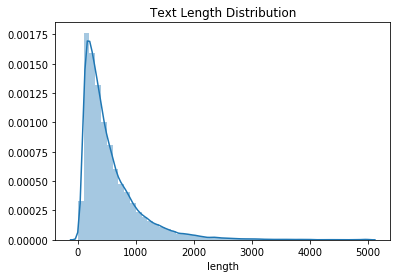

In [6]:
fig1 = plt.figure()
sns.distplot(review['length'],kde=True,bins=50)
plt.title('Text Length Distribution')

Text(0, 0.5, 'Count')

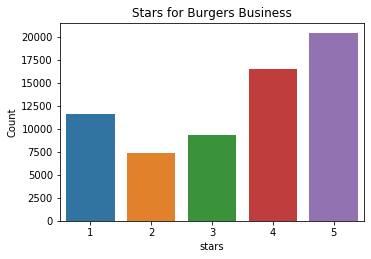

In [7]:
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot(2,2,1)
ax1 = sns.countplot(review.stars)
ax1.set_title('Stars for Burgers Business')
ax1.set_ylabel('Count')

# ax1 = plt.subplot(2,2,2)
# ax1 = sns.countplot(review.useful)
# ax1.set_title('useful review')
# ax1.set_ylabel('Count')

# ax1 = plt.subplot(2,2,3)
# ax1 = sns.countplot(review.funny)
# ax1.set_title('funny review')
# ax1.set_ylabel('Count')

# ax1 = plt.subplot(2,2,4)
# ax1 = sns.countplot(review.cool)
# ax1.set_title('cool review')
# ax1.set_ylabel('Count')

# plt.tight_layout()

Text(0.5, 1, 'Heatmap of Variables')

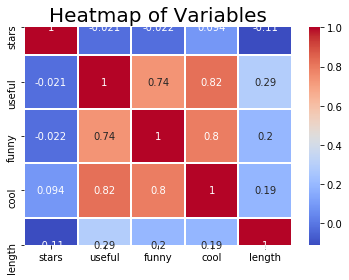

In [8]:
review_cor = review.corr()
fig = plt.figure()
axes=sns.heatmap(review_cor,cmap = 'coolwarm',linewidth=1,linecolor='white',annot=True)
axes.set_title('Heatmap of Variables',fontsize=20)

In [9]:
def remove_punc_stopword(text):
    remove_punc = [word for word in text if word not in string.punctuation]
    remove_punc = ''.join(remove_punc)
    return [word.lower() for word in remove_punc.split() if word.lower() not in stopwords.words('english')]

In [33]:
review_text = review.copy()
review_text = review[['stars','text']]
review_text['text_single'] = review_text['text'].apply(remove_punc_stopword)

C:\Users\KOU\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
review_text = pd.read_csv('data/review_text.csv')

In [12]:
# review_text.to_csv('data/review_text.csv')

In [30]:
def get_2word(text):
    returnlist =[]
    biwords = list(nltk.bigrams(text))
    for biword in biwords:
        returnlist.append(' '.join(biword))
    return returnlist

In [31]:
review1 = review_text[:25000].copy()
review1['text_bi'] = review1.text_single.apply(get_2word)
review2 = review_text[25000:50000].copy()
review2['text_bi'] = review2.text_single.apply(get_2word)
review3 = review_text[50000:].copy()
review3['text_bi'] = review3.text_single.apply(get_2word)

review_text =  pd.concat([review1,review2,review3],axis=0)

In [32]:
review_text.head()

,Unnamed: 0,stars,text,text_single,text_bi
0,0,2,Parking is tough to get here so I don't get to...,"['parking', 'tough', 'get', 'dont', 'get', 'go...","[[ ', ' p, p a, a r, r k, k i, i n, n g, g ', ..."
1,1,2,Food was great! Loved the pepperoni rolls and ...,"['food', 'great', 'loved', 'pepperoni', 'rolls...","[[ ', ' f, f o, o o, o d, d ', ' ,, , , ', ..."
2,2,5,My hubby and I went here for our first date ni...,"['hubby', 'went', 'first', 'date', 'night', 'a...","[[ ', ' h, h u, u b, b b, b y, y ', ' ,, , , ..."
3,3,3,Johnny Rockets is a decent choice for a weeken...,"['johnny', 'rockets', 'decent', 'choice', 'wee...","[[ ', ' j, j o, o h, h n, n n, n y, y ', ' ,, ..."
4,4,5,Fries are cooked to perfection....very crispy....,"['fries', 'cooked', 'perfectionvery', 'crispy'...","[[ ', ' f, f r, r i, i e, e s, s ', ' ,, , , ..."


In [16]:
#review_text.to_csv('data/review_text.csv',index=False)

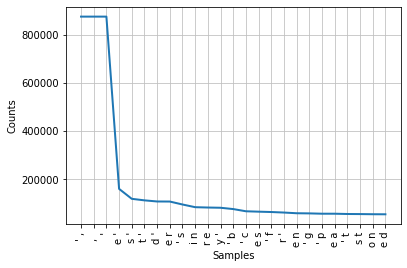

In [17]:
review_5stars = review_text[review_text.stars == 5].reset_index(drop=True)
word_split = []
for i in range(len(review_5stars)):
    for word in review_5stars.text_bi[i]:
        if 'food' not in word and 'place' not in word and 'back' not in word and 'time' not in word:
            word_split.append(word)
        

FreqDist(word_split).plot(25,cumulative=False)
#print(FreqDist(word_split).most_common(30))

In [18]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color ='black',
    stopwords = STOPWORDS).generate(str(review_5stars.text.values))

fig = plt.figure(facecolor='k',edgecolor='k')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

NameError: name 'WordCloud' is not defined

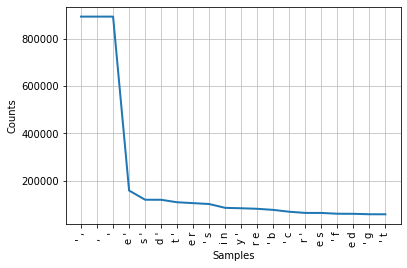

In [19]:
review_4stars = review_text[review_text.stars == 4].reset_index(drop=True)
word_split = []
for i in range(len(review_4stars)):
    for word in review_4stars.text_bi[i]:
        if 'food' not in word and 'place' not in word and 'back' not in word and 'time' not in word:
            word_split.append(word)
        
FreqDist(word_split).plot(20,cumulative=False)

In [20]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color ='black',
    stopwords = STOPWORDS).generate(str(review_4stars.text.values))

fig = plt.figure(facecolor='k',edgecolor='k')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

NameError: name 'WordCloud' is not defined

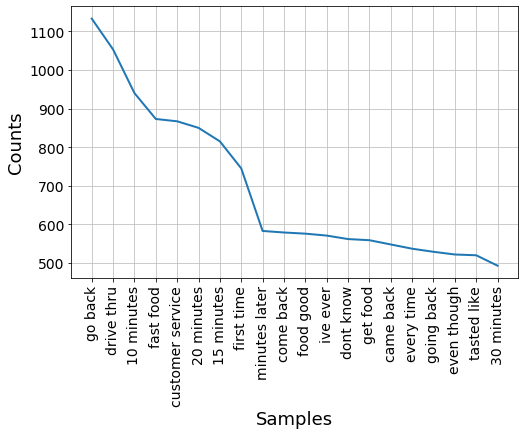

[('go back', 1133), ('drive thru', 1053), ('10 minutes', 940), ('fast food', 873), ('customer service', 867), ('20 minutes', 850), ('15 minutes', 815), ('first time', 745), ('minutes later', 583), ('come back', 579), ('food good', 576), ('ive ever', 571), ('dont know', 562), ('get food', 559), ('came back', 548), ('every time', 537), ('going back', 529), ('even though', 522), ('tasted like', 520), ('30 minutes', 493), ('last time', 490), ('onion rings', 485), ('minutes get', 479), ('5 minutes', 465), ('wont back', 462), ('ice cream', 442), ('didnt even', 429), ('looked like', 420), ('never go', 408), ('long time', 401), ('pretty good', 399), ('well done', 393), ('45 minutes', 389), ('im sure', 378), ('chicken sandwich', 376), ('take order', 368), ('much better', 352), ('burger king', 341), ('told us', 339), ('service slow', 333)]


In [22]:
review_12stars = review_text[review_text.stars < 3].reset_index(drop=True)
word_split = []
for i in range(len(review_12stars)):
    for word in review_12stars.text_bi[i]:
        word_split.append(word)
        
plt.figure(figsize=(8, 5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Samples', fontsize=18)
plt.ylabel('Counts', fontsize=18)
FreqDist(word_split).plot(20,cumulative=False)
print(FreqDist(word_split).most_common(40))

In [23]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color ='black',
    stopwords = STOPWORDS).generate(str(review_12stars.text.values))

fig = plt.figure(facecolor='k',edgecolor='k')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

NameError: name 'WordCloud' is not defined

In [24]:
def word_example(word='',number=10,star_low=1,star_high=5,seed = 0,is_state=False,state='useful',over=0):
    """generate n=number of reviews that contain 'word' randomly.
    And the reviews' stars are bounded by star_low and star_high.
    If is_state is True, the reviews are also need to be described as $state(useful,funny,cool) by at least $over people ."""
    high_index = review.stars.values<=star_high
    low_index = review.stars.values>=star_low
    if is_state:
        state_index = review[state].values>over
        filter_index = high_index.astype(int)+low_index.astype(int)+state_index.astype(int)
    else:
        filter_index = high_index.astype(int)+low_index.astype(int)
        
    tmp_df = shuffle(review[filter_index==2],random_state = seed)
    
    count=0
    for i in range(tmp_df.shape[0]):
        if count<number:
            if word in tmp_df.iloc[i].text.lower():
                print(f'{count+1}: {tmp_df.iloc[i].text}')
                print('-'*120)
                count+=1
        else:
            break        

In [25]:
word_example('list',number = 3,star_low=1,star_high=2,seed=1)

1: i'm sure i'll be back to this place again due to my now-residency in lakewood and proclivity for craft beers, but it did not blow my mind at all on this maiden voyage.

had festina peche draft (gotta drink it while its in season, can't resist it) and tried the buckeye strawberry tart which was the pinkest beer i've ever had, but still good. wouldn't drink more than one though. the beer selection is awesome, didn't even look at the bottle list because there were plenty of draft options.

the food - meh. i had the '76 burger and it just seemed greasy.. like beyond the level i can tolerate. i don't expect a LOT from bar food, but i expect to not be grossed out. the shoestring fries rocked and i ate all of them, deep fried pickles don't do it for me either, i'm just interested in pickles straight up. 

the service was attentive but apathetic, and that's fine. i don't expect servers to be my bffs. 

bbe, i know i'll give you another go round, but this one left a little to be desired.
---

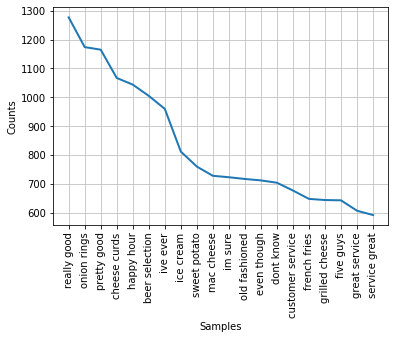

In [26]:
review_useful = review_text[review.useful > 0].reset_index(drop=True)
word_split = []
for i in range(len(review_useful)):
    for word in review_useful.text_bi[i]:
        if 'food' not in word and 'place' not in word and 'back' not in word and 'time' not in word:
            word_split.append(word)

FreqDist(word_split).plot(20,cumulative=False)

In [27]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color ='black',
    stopwords = STOPWORDS).generate(str(review_useful.text.values))

fig = plt.figure(facecolor='k',edgecolor='k')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)

NameError: name 'WordCloud' is not defined

In [ ]:
word_example('bar',number = 3,star_low=4,star_high=4,seed=2,is_state=True,state='useful',over=1)